In [23]:

# basic packages
import pandas as pd
import numpy as np
import datetime as dt
from pytz import timezone
import urllib
import os
import math
from scipy import stats
from scipy.signal import find_peaks, spectrogram

# packages for visualizations
import matplotlib.dates as mdates

from matplotlib import pyplot as plt


In [24]:

file_path = './Indoor and outdoor air temperature data/HT1/Indoor air temperatures/House 1.xlsx'
file_path1 = './Indoor and outdoor air temperature data/HT1/Indoor air temperatures/House 2.xlsx'

file_path2 = './Indoor and outdoor air temperature data/HT2/Indoor air temperatures/House 1.xlsx'
file_path3 = './Indoor and outdoor air temperature data/HT2/Indoor air temperatures/House 2.xlsx'

file_path4 = './Indoor and outdoor air temperature data/HT1/Outdoor temperature sensor.xlsx'
file_path5 = './Indoor and outdoor air temperature data/HT2/Outdoor temperature sensor.xlsx'


# heating trial one
house1_indoor_ht1 = pd.read_excel(file_path)
house2_indoor_ht1 = pd.read_excel(file_path1)
outdoor_ht1 = pd.read_excel(file_path4)


# heating trial two
house1_indoor_ht2 = pd.read_excel(file_path2)
house2_indoor_ht2 = pd.read_excel(file_path3)
outdoor_ht2 = pd.read_excel(file_path4)





In [25]:
import pandas as pd

# Assuming you have loaded the dataframes as described
# Combine outdoor temperature with indoor temperatures for heating trial one (HT1)
house1_indoor_ht1 = pd.merge(house1_indoor_ht1, outdoor_ht1, on='Timestamp', how='inner', suffixes=('_indoor', '_outdoor'))
house2_indoor_ht1 = pd.merge(house2_indoor_ht1, outdoor_ht1, on='Timestamp', how='inner', suffixes=('_indoor', '_outdoor'))

# Combine outdoor temperature with indoor temperatures for heating trial two (HT2)
# house1_indoor_ht2 = pd.merge(house1_indoor_ht2, outdoor_ht2, on='Timestamp', how='inner', suffixes=('_indoor', '_outdoor'))
# house2_indoor_ht2 = pd.merge(house2_indoor_ht2, outdoor_ht2, on='Timestamp', how='inner', suffixes=('_indoor', '_outdoor'))

house2_indoor_ht2


,Timestamp,Dining Room,Bedroom 2,Hallway ground floor,Bathroom,Kitchen,Unoccupied Room,Bedroom 1,Living Room,Hallway first floor
0,2014-03-18 00:00:00.010,18.623358,18.711988,19.468324,16.970420,19.036892,17.922324,18.654734,19.516150,19.253366
1,2014-03-18 00:01:00.000,18.616178,18.702124,19.453168,16.984138,19.002040,17.927370,18.649510,19.512718,19.251998
2,2014-03-18 00:02:00.000,18.601822,18.696194,19.451772,16.970420,18.972592,17.938674,18.637786,19.501028,19.234340
3,2014-03-18 00:03:00.000,18.594642,18.692230,19.418182,16.954306,18.951888,17.921078,18.644316,19.496870,19.212640
4,2014-03-18 00:04:00.001,18.587464,18.684998,19.411318,16.962650,18.969282,17.915394,18.644316,19.490008,19.216046
...,...,...,...,...,...,...,...,...,...,...
40257,2014-04-21 23:55:00.000,18.700300,18.826636,19.237626,16.972516,18.943416,18.702772,18.341548,19.391574,19.037580
40258,2014-04-21 23:56:00.000,18.699664,18.823338,19.225416,16.965930,18.932092,18.693594,18.344130,19.381280,19.034236
40259,2014-04-21 23:57:00.000,18.685850,18.818012,19.217308,16.953424,18.930758,18.669340,18.316520,19.365584,19.033570
40260,2014-04-21 23:58:00.000,18.676006,18.811386,19.200362,16.939706,18.926750,18.678548,18.317828,19.361516,19.021534


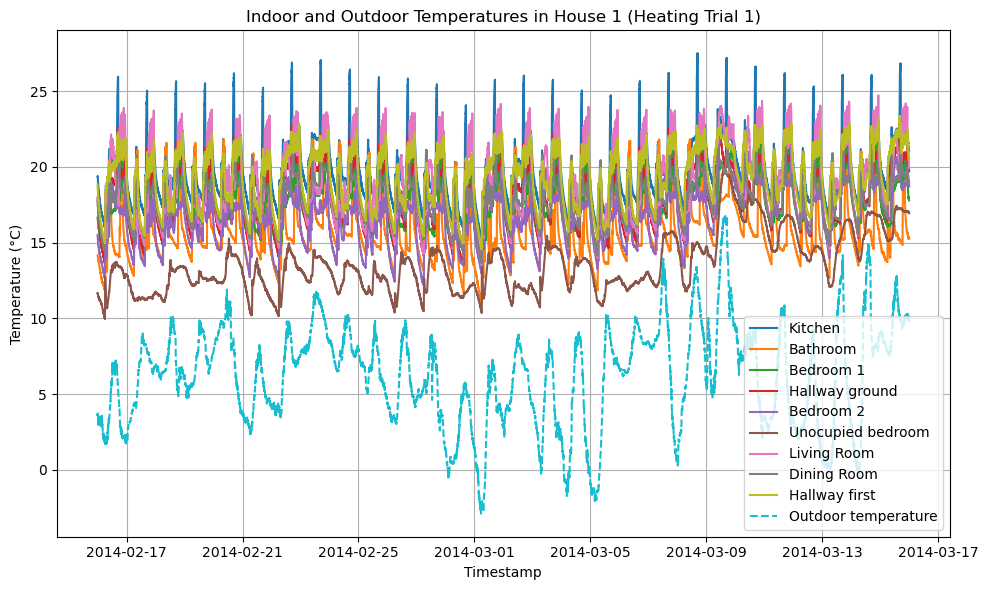

In [26]:
import matplotlib.pyplot as plt

# Convert 'Timestamp' column to datetime
house1_indoor_ht1['Timestamp'] = pd.to_datetime(house1_indoor_ht1['Timestamp'])

# Plotting
plt.figure(figsize=(10, 6))

# Plot indoor temperatures
plt.plot(house1_indoor_ht1['Timestamp'], house1_indoor_ht1['Kitchen'], label='Kitchen')
plt.plot(house1_indoor_ht1['Timestamp'], house1_indoor_ht1['Bathroom'], label='Bathroom')
plt.plot(house1_indoor_ht1['Timestamp'], house1_indoor_ht1['Bedroom 1'], label='Bedroom 1')
plt.plot(house1_indoor_ht1['Timestamp'], house1_indoor_ht1['Hallway ground'], label='Hallway ground')
plt.plot(house1_indoor_ht1['Timestamp'], house1_indoor_ht1['bedroom 2'], label='Bedroom 2')
plt.plot(house1_indoor_ht1['Timestamp'], house1_indoor_ht1['Unocupied bedroom'], label='Unocupied bedroom')
plt.plot(house1_indoor_ht1['Timestamp'], house1_indoor_ht1['Living Room'], label='Living Room')
plt.plot(house1_indoor_ht1['Timestamp'], house1_indoor_ht1['dining room'], label='Dining Room')
plt.plot(house1_indoor_ht1['Timestamp'], house1_indoor_ht1['hallway first'], label='Hallway first')

# Plot outdoor temperature
plt.plot(house1_indoor_ht1['Timestamp'], house1_indoor_ht1['outdoor temperature'], label='Outdoor temperature', linestyle='--')

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Indoor and Outdoor Temperatures in House 1 (Heating Trial 1)')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


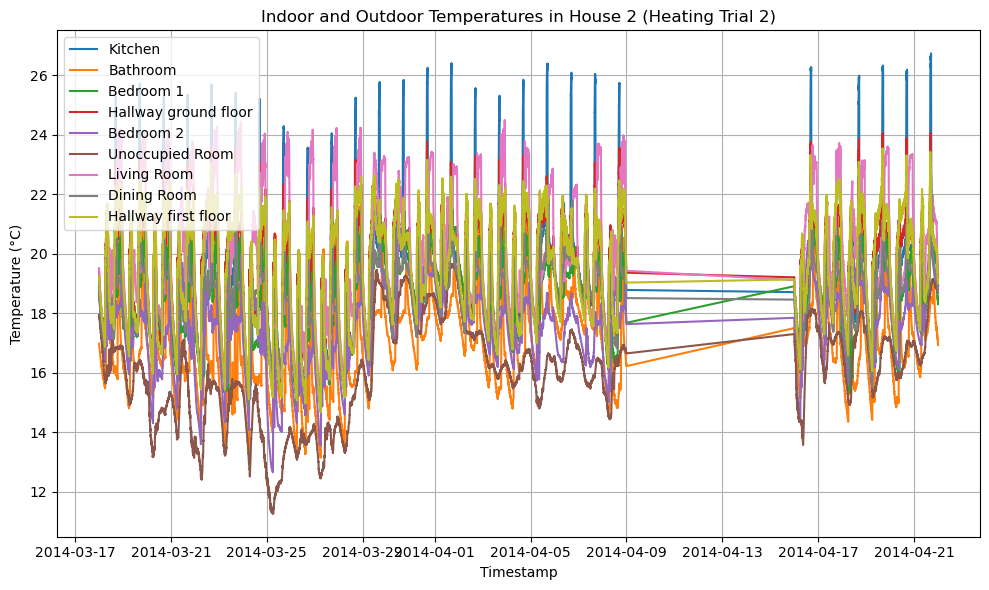

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data for house2_indoor_ht2
# Assuming you've already loaded the data into a DataFrame named house2_indoor_ht2

# Convert 'Timestamp' column to datetime
house2_indoor_ht2['Timestamp'] = pd.to_datetime(house2_indoor_ht2['Timestamp'])

# Plotting
plt.figure(figsize=(10, 6))

# Plot indoor temperatures
plt.plot(house2_indoor_ht2['Timestamp'], house2_indoor_ht2['Kitchen'], label='Kitchen')
plt.plot(house2_indoor_ht2['Timestamp'], house2_indoor_ht2['Bathroom'], label='Bathroom')
plt.plot(house2_indoor_ht2['Timestamp'], house2_indoor_ht2['Bedroom 1'], label='Bedroom 1')
plt.plot(house2_indoor_ht2['Timestamp'], house2_indoor_ht2['Hallway ground floor'], label='Hallway ground floor')
plt.plot(house2_indoor_ht2['Timestamp'], house2_indoor_ht2['Bedroom 2'], label='Bedroom 2')
plt.plot(house2_indoor_ht2['Timestamp'], house2_indoor_ht2['Unoccupied Room'], label='Unoccupied Room')
plt.plot(house2_indoor_ht2['Timestamp'], house2_indoor_ht2['Living Room'], label='Living Room')
plt.plot(house2_indoor_ht2['Timestamp'], house2_indoor_ht2['Dining Room'], label='Dining Room')
plt.plot(house2_indoor_ht2['Timestamp'], house2_indoor_ht2['Hallway first floor'], label='Hallway first floor')

# # Plot outdoor temperature
# plt.plot(house2_indoor_ht2['Timestamp'], house2_indoor_ht2['outdoor temperature_indoor'], label='Outdoor temperature', linestyle='--')

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Indoor and Outdoor Temperatures in House 2 (Heating Trial 2)')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


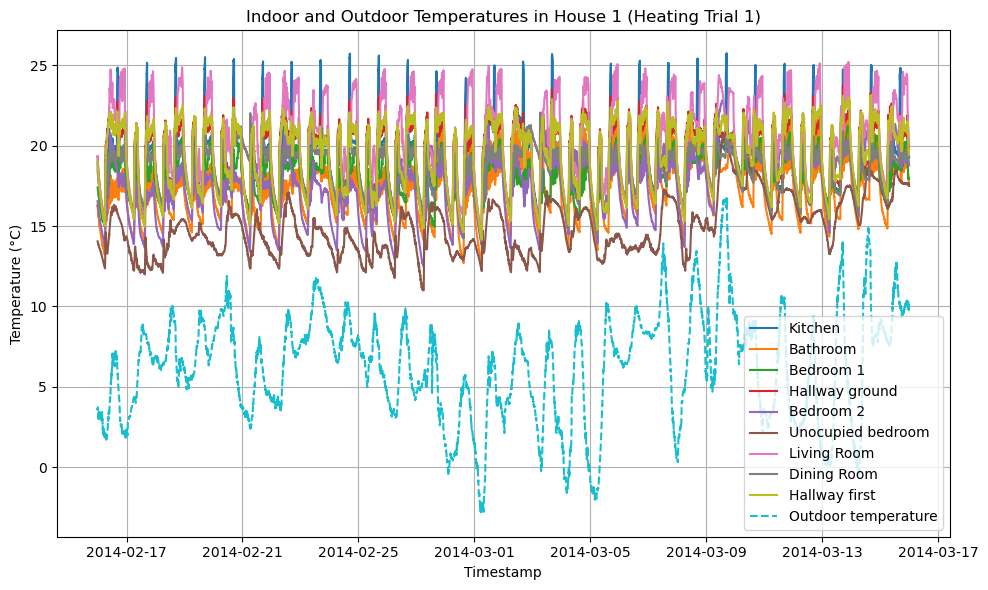

In [ ]:

# Convert 'Timestamp' column to datetime
house2_indoor_ht1['Timestamp'] = pd.to_datetime(house2_indoor_ht1['Timestamp'])

# Plotting
plt.figure(figsize=(10, 6))

# Plot indoor temperatures
plt.plot(house2_indoor_ht1['Timestamp'], house2_indoor_ht1['Kitchen'], label='Kitchen')
plt.plot(house2_indoor_ht1['Timestamp'], house2_indoor_ht1['Bathroom'], label='Bathroom')
plt.plot(house2_indoor_ht1['Timestamp'], house2_indoor_ht1['Bedroom 1'], label='Bedroom 1')
plt.plot(house2_indoor_ht1['Timestamp'], house2_indoor_ht1['Hallway ground floor'], label='Hallway ground')
plt.plot(house2_indoor_ht1['Timestamp'], house2_indoor_ht1['Bedroom 2'], label='Bedroom 2')
plt.plot(house2_indoor_ht1['Timestamp'], house2_indoor_ht1['unoccupied bedroom'], label='Unocupied bedroom')
plt.plot(house2_indoor_ht1['Timestamp'], house2_indoor_ht1['Living Room'], label='Living Room')
plt.plot(house2_indoor_ht1['Timestamp'], house2_indoor_ht1['Dining Room'], label='Dining Room')
plt.plot(house2_indoor_ht1['Timestamp'], house2_indoor_ht1['Hallway first floor'], label='Hallway first')

# Plot outdoor temperature
plt.plot(house2_indoor_ht1['Timestamp'], house2_indoor_ht1['outdoor temperature'], label='Outdoor temperature', linestyle='--')

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Indoor and Outdoor Temperatures in House 1 (Heating Trial 1)')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


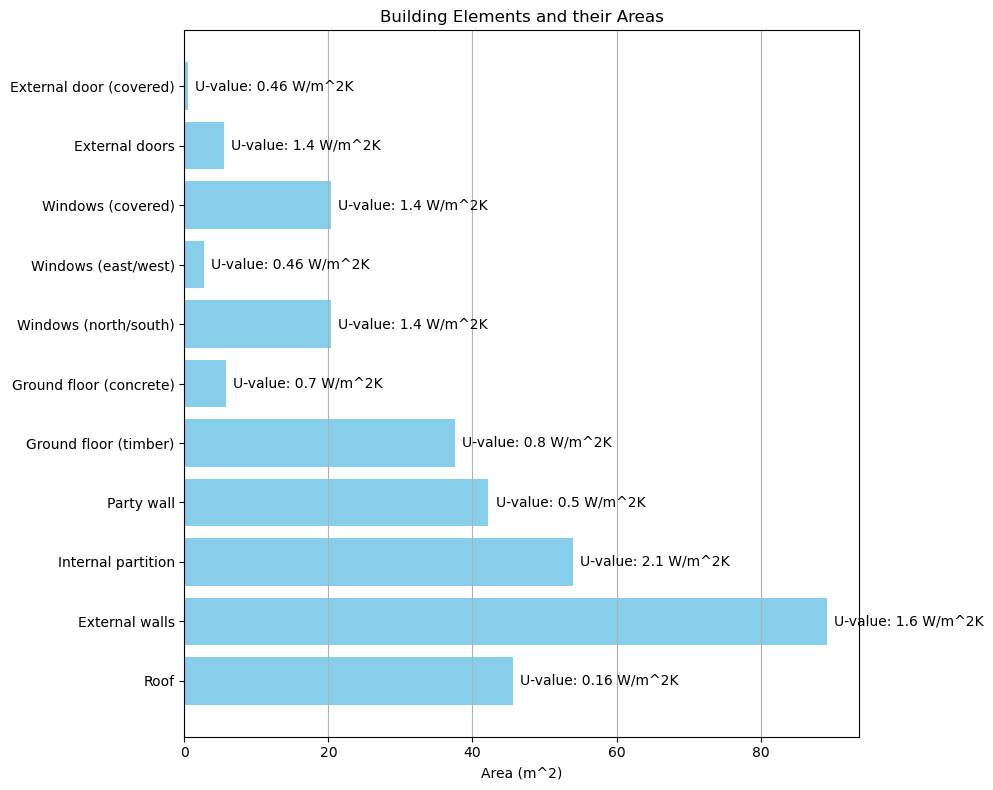

In [ ]:
import matplotlib.pyplot as plt

# Data for building elements
elements = ['Roof', 'External walls', 'Internal partition', 'Party wall', 
            'Ground floor (timber)', 'Ground floor (concrete)', 'Windows (north/south)',
            'Windows (east/west)', 'Windows (covered)', 'External doors', 
            'External door (covered)']
u_values = [0.16, 1.6, 2.1, 0.5, 0.8, 0.7, 1.4, 0.46, 1.4, 1.4, 0.46]
areas = [45.6, 89.2, 53.9, 42.2, 37.6, 5.7, 20.3, 2.7, 20.3, 5.5, 0.51]

# Create horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(elements, areas, color='skyblue')
plt.xlabel('Area (m^2)')
plt.title('Building Elements and their Areas')

# Add U-values as text on the bars
for i in range(len(elements)):
    plt.text(areas[i] + 1, i, f'U-value: {u_values[i]} W/m^2K', va='center')

plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [ ]:
    # Import the simstock package
import simstock as sim

    # Let's say we have some test data stored in a file called test.csv. 
    # We can read it in as a SimstockDataframe:
sdf = sim.read_csv("test.csv")

    # We now perform geometrical pre-processing:
sdf.preprocessing()

    # Now create an new instance of an IDFmanager object that takes the
    # processed SimstockDataframe as an argument:
simulation = sim.IDFmanager(sdf)

    # Create the thermal zones necessary for EnergyPlus
simulation.create_model_idf()

    # Run the energy plus simulation
simulation.run()

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [ ]:
# Copyright (c) 2016 Jamie Bull
# =======================================================================
#  Distributed under the MIT License.
#  (See accompanying file LICENSE or copy at
#  http://opensource.org/licenses/MIT)
# =======================================================================
"""
Class to run IDF objects in EnergyPlus.

"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import distutils.spawn
import logging
import os
import platform
from pprint import pprint
from subprocess import CalledProcessError
from subprocess import check_call
import tempfile


def find_version():
    """Get the installed EnergyPlus version number.
    """
    energyplus = distutils.spawn.find_executable('energyplus')
    if not energyplus:
        raise AttributeError
    energyplus = os.path.realpath(energyplus)  # follow links in /usr/bin
    folder = os.path.dirname(energyplus)
    version = os.path.basename(folder)[-5:]
#    version = version.replace('.', '-')
#    assert version[1] == '-' and version[3] == '-'

    return version

try:
    VERSION = os.environ["ENERGYPLUS_INSTALL_VERSION"]  # used in CI file)
except KeyError:
    VERSION = find_version()

if platform.system() == 'Windows':
    EPLUS_HOME = "C:/EnergyPlusV{VERSION}".format(**locals())
    EPLUS_EXE = os.path.join(EPLUS_HOME, 'energyplus.exe')
elif platform.system() == "Linux":
    EPLUS_HOME = "/usr/local/EnergyPlus-{VERSION}".format(**locals())
    EPLUS_EXE = os.path.join(EPLUS_HOME, 'energyplus')
else:
    EPLUS_HOME = "/Applications/EnergyPlus-2{VERSION}".format(**locals())
    EPLUS_EXE = os.path.join(EPLUS_HOME, 'energyplus')

EPLUS_WEATHER = os.path.join(EPLUS_HOME, 'WeatherData')
THIS_DIR = os.path.abspath(os.path.dirname('./Users/alexmellers/Documents/GitHub/datascience/building_energy_modelling.ipynb'))


def run(idf=None, weather=None, output_directory='', annual=False,
        design_day=False, idd=None, epmacro=False, expandobjects=False,
        readvars=False, output_prefix=None, output_suffix=None, version=False,
        verbose='v'):
    """
    Wrapper around the EnergyPlus command line interface.

    Parameters
    ----------
    idf : str
        Full or relative path to the IDF file to be run.

    weather : str
        Full or relative path to the weather file.

    output_directory : str, optional
        Full or relative path to an output directory (default: 'run_outputs)

    annual : bool, optional
        If True then force annual simulation (default: False)

    design_day : bool, optional
        Force design-day-only simulation (default: False)

    idd : str, optional
        Input data dictionary (default: Energy+.idd in EnergyPlus directory)

    epmacro : str, optional
        Run EPMacro prior to simulation (default: False).

    expandobjects : bool, optional
        Run ExpandObjects prior to simulation (default: False)

    readvars : bool, optional
        Run ReadVarsESO after simulation (default: False)

    output_prefix : str, optional
        Prefix for output file names (default: eplus)

    output_suffix : str, optional
        Suffix style for output file names (default: L)
            L: Legacy (e.g., eplustbl.csv)
            C: Capital (e.g., eplusTable.csv)
            D: Dash (e.g., eplus-table.csv)

    version : bool, optional
        Display version information (default: False)

    verbose: str
        Set verbosity of runtime messages (default: v)
            v: verbose
            q: quiet

    Returns
    -------
    str : status

    Raises
    ------
    CalledProcessError

    """
    args = locals().copy()
    if version:
        # just get EnergyPlus version number and return
        cmd = [EPLUS_EXE, '--version']
        check_call(cmd)
        return

    # get unneeded params out of args ready to pass the rest to energyplus.exe
    verbose = args.pop('verbose')
    idf = os.path.abspath(args.pop('idf'))

    # convert paths to absolute paths if required
    if os.path.isfile(args['weather']):
        args['weather'] = os.path.abspath(args['weather'])
    else:
        args['weather'] = os.path.join(EPLUS_WEATHER, args['weather'])
    args['output_directory'] = os.path.abspath(args['output_directory'])

    # store the directory we start in
    cwd = os.getcwd()
    run_dir = os.path.abspath(tempfile.mkdtemp())
    os.chdir(run_dir)

    # build a list of command line arguments
    cmd = [EPLUS_EXE]
    for arg in args:
        if args[arg]:
            if isinstance(args[arg], bool):
                args[arg] = ''
            cmd.extend(['--{}'.format(arg.replace('_', '-'))])
            if args[arg] != "":
                cmd.extend([args[arg]])
    cmd.extend([idf])

    try:
        if verbose == 'v':
            check_call(cmd)
        elif verbose == 'q':
            check_call(cmd, stdout=open(os.devnull, 'w'))
    except CalledProcessError as e:
        # potentially catch contents of std out and put it in the error
        logging.error(e, exc_info=True)
        raise
    except IOError as e:
        logging.error(e, exc_info=True)
        raise
    except OSError as e:
        logging.error(e, exc_info=True)
        for c in cmd:
            print(c)
        raise
    finally:
        os.chdir(cwd)
    return 'OK'

IDF_DIR  = './Users/alexmellers/Documents/GitHub/datascience/building_energy_modelling.ipynb'

idf_path = os.path.join(IDF_DIR, 'your_idf_file.idf')
weather_path = os.path.join(IDF_DIR, 'your_weather_file.epw')

# Run the EnergyPlus simulation
status = run(
    idf=idf_path,
    weather=weather_path,
    output_directory='path/to/output_directory',
    annual=False,  # Set to True if you want to force annual simulation
    design_day=False,  # Set to True if you want to force design-day-only simulation
    idd=None,
    epmacro=False,
    expandobjects=False,
    readvars=False,
    output_prefix=None,
    output_suffix=None,
    version=False,
    verbose='v'  # Set to 'v' for verbose output or 'q' for quiet output
)

input_file: File does not exist: /Users/alexmellers/Documents/GitHub/datascience/Users/alexmellers/Documents/GitHub/datascience/building_energy_modelling.ipynb/your_idf_file.idf
Run with --help for more information.
ERROR:root:Command '['/Applications/EnergyPlus-23-2-0/energyplus', '--weather', '/Applications/EnergyPlus-23-2-0/WeatherData/./Users/alexmellers/Documents/GitHub/datascience/building_energy_modelling.ipynb/your_weather_file.epw', '--output-directory', '/Users/alexmellers/Documents/GitHub/datascience/path/to/output_directory', '/Users/alexmellers/Documents/GitHub/datascience/Users/alexmellers/Documents/GitHub/datascience/building_energy_modelling.ipynb/your_idf_file.idf']' returned non-zero exit status 105.
Traceback (most recent call last):
  File "/var/folders/s4/22x3mwpj4bldz0pl87jpf5th0000gn/T/ipykernel_11917/305853527.py", line 158, in run
    check_call(cmd)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/subprocess.py", line 413, in check_cal

CalledProcessError: Command '['/Applications/EnergyPlus-23-2-0/energyplus', '--weather', '/Applications/EnergyPlus-23-2-0/WeatherData/./Users/alexmellers/Documents/GitHub/datascience/building_energy_modelling.ipynb/your_weather_file.epw', '--output-directory', '/Users/alexmellers/Documents/GitHub/datascience/path/to/output_directory', '/Users/alexmellers/Documents/GitHub/datascience/Users/alexmellers/Documents/GitHub/datascience/building_energy_modelling.ipynb/your_idf_file.idf']' returned non-zero exit status 105.